# Math 5600 Homework #1
# Walter Shearon and  Aaron Langford

In [67]:
import numpy as np
from math import cos,sin,sqrt,exp
import matplotlib.pyplot as plt

# Simple Programming Exercises
## 1.
### (a)

In [68]:
def function(x):
    output = (x**2)*(exp(-2*x))+((cos(3*x))/(sqrt(1+x)))
    return output

In [69]:
vfunc = np.vectorize(function)
vfunc([0,1,2,3,4,5,6,7,8])

array([ 1.        , -0.56469512,  0.62761713, -0.43325636,  0.38275037,
       -0.30900629,  0.24979745, -0.19361079,  0.1414002 ])

### (b)

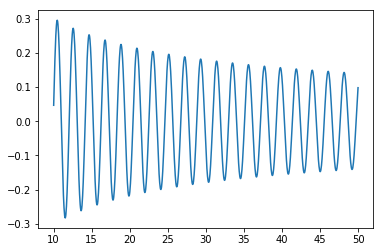

In [70]:
interval = np.linspace(10,50,1000)
out=vfunc(interval)
plt.plot(interval,out)
plt.show()

## 2.

In [71]:
def norm(x):
    squares=[i**2 for i in x]
    return sqrt(sum(squares))
print(norm([1,2,3,4]))
print(norm([-1,-2,0,1,2]))

5.477225575051661
3.1622776601683795


## 3.
### (a)

In [72]:
def for_factorial(x):
    
    factorial = 1
    if x < 0:
        print("must be positive")
    elif x == 0:
        print("factorial of 0 = 1")
    else:
        for i in range(1,x + 1):
            factorial = factorial*i
        print('factorial of ' + str(x) + ' = ' + str(factorial))
(for_factorial(-8))
(for_factorial(0))
(for_factorial(4))
(for_factorial(8))

must be positive
factorial of 0 = 1
factorial of 4 = 24
factorial of 8 = 40320


### (b)

In [73]:
def while_factorial(n):
    num = 1
    while n >= 1:
        num = num * n
        n = n - 1
    print('factorial = '+ str(num))
(while_factorial(4))
(while_factorial(7))
(while_factorial(0))

factorial = 24
factorial = 5040
factorial = 1


## 4.
### (a)

In [74]:
def fiblist(n, sequence):
    length = len(sequence)
    if length == n:
        return
    if length == 0 or length == 1:       
        sequence.append(1)
    else:
        sequence.append(sequence[length-1]+sequence[length-2])
    fiblist(n, sequence)    
sequence = []
fiblist(15, sequence)
print(sequence) 

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]


### (b)

In [75]:
def fib(n):
    if n == 0: 
        return 0
    elif n == 1: 
        return 1
    else: 
        return fib(n-1)+fib(n-2)
gold=(1+sqrt(5))/2
def approx_gold(e):
    n=2
    while abs(((fib(n)/(fib(n-1))))-gold)>e:
        n=n+1
    return ((fib(n)/(fib(n-1))))

In [76]:
print(approx_gold(.1))
print(approx_gold(.0001))
print(approx_gold(.0000000001))

1.6666666666666667
1.6179775280898876
1.6180339886704431


## 5.

In [77]:
B=[1,2,3]
I=[[1,0,0],[0,0,1],[0,1,0]]
C=[[1,2,3],[3,4,6],[5,6,7]]
D=[1,2,3,4]
def mat_vect_using_numpy(a,b):
    if len(a) != len(b):
        print("size error")
    else:
        return list(np.matmul(a,b))
print(mat_vect_using_numpy(C,B))
print(mat_vect_using_numpy(C,D))
print(mat_vect_using_numpy(I,B))

[14, 29, 38]
size error
None
[1, 3, 2]


In [78]:
def mat_vect_using_fors(A,y):
    k=A
    if len(A)==len(y):
        for i in range(len(A)):
            for j in range(len(y)):
                k[i][j]=(A[i][j]*y[j])
        vector = [sum(i) for i in k]
        return vector
    elif len(A)!=len(y):
        print('size error')
print(mat_vect_using_fors(C,B))
print(mat_vect_using_fors(C,D))
print(mat_vect_using_fors(I,B))

[14, 29, 38]
size error
None
[1, 3, 2]


# Root Finding
## 1. Division without division
### (a)

In [79]:
## approximates a / b with error of at most epsilon
## x_not must be positive and less than 2 / b
## epsilon must be less than x_not
def approx_div(a, b, x_not, epsilon):
    if x_not <= 0 or b * x_not >= 2:
        raise ValueError("x_not must be positive and less than 2 / b")
    if epsilon >= x_not:
        raise ValueError("x_not must be greater than epsilon")
    ## approximate 1/b by approximating the root of b - 1/x
    x = x_not
    xn = x * (2 - (b * x))
    while abs(x - xn) >= abs(epsilon):
        x = xn
        xn = x * (2 - (b * x))
        
    return xn * a
    

In [80]:
approx_div(1.0, 2.0, 2.168404344971009e-18, 2.168404344971009e-19)

0.5

### (b)

In [81]:
def newton(f, df, x_not, err, iter_max):
    i = 1
    x = 0
    x_prev = x_not
    while abs(x_prev - x) > err and i < iter_max:
        denom = df(x_not)
        if denom == 0:
            return (0, False, 'denom was 0 😭')
        
        x = x_not - approx_div(f(x_not), denom, 2.168404344971009e-18, 2.168404344971009e-19)
    
        i += 1
        x_prev = x_not
        x_not = x
        
    if i >= iter_max:
        return (0, False, 'exceeded max iterations 😭')
    else:
        return (x, True, '')
    
    

In [82]:
f = lambda x: (x**5) - (x**4) + 24
df = lambda x: 5*(x**4) - 4*(x**3)
newton(f, df, -1.5, 0.00000000000000001, 1000)

(-1.7230192603557493, True, '')

## 2. Convergence of Newton's Method
### (a)
Prove this function only has 1 root
$$f(x) = 2x - cos(x)$$
* Differentiating yields
$f'(x) = 2 + sin(x)$
* Given that $f'(x) > 0$ for all $x$, $f(x)$ is strictly monotonically increasing.
* A function that is strictly monotonically increasing can only have 1 root.

### (b)
Let $g(x)= x - \frac{f(x)}{f'(x)}$ then finding a root for $f(x)=0$ using Newton's Method is equivalent to finding the fixed point of $g(x)$
<br />
Considering the fixed point iteration of g(x) we have
<br />
$$g'(x) = 1 - \frac{f'(x)f'(x)-f(x)f''(x)}{(f'(x))^2} = \frac{f(x)f''(x)}{(f'(x))^2}$$
<br />
Now $f(\alpha)=0 \rightarrow g'(\alpha)=0$ 
<br />
Since $g(x)$ is continuous, it is possible to find a $\gamma>0$ so that $ \left| g'(x) \right| < 1 $ for all $x \in (\alpha-\gamma,\alpha+\gamma)$ 
<br />
Therefore, a sufficient condition for the initial guess $x_0$ to give a convergent sequence is that $x_0 \in (\alpha-\gamma,\alpha+\gamma)$ with $\gamma$ chosen so that 
<br />
$$ \frac{\left|f(x)f''(x)\right|}{\left|f'(x)\right|^2}<1$$ for all $x_0 \in (\alpha-\gamma,\alpha+\gamma)$
<br />
<br />
$\therefore$ If $ x_0 \in I=(\alpha-\gamma,\alpha+\gamma)$ then $ x_0 $
will converge to $\alpha$

## 3. From Divergence to Convergence

$h(\alpha)=\alpha$ is equivalent to $g(\alpha)=\alpha$ if $c\neq0$ since
<br />
$$h(\alpha)=(1-c)\alpha+cg(\alpha)=\alpha$$
<br />
$$         \rightarrow\alpha - c\alpha + cg(\alpha)=\alpha $$
<br />
$$         \rightarrow c(g(\alpha)-\alpha)=0 $$
<br />
$$         \therefore g(\alpha)=\alpha $$
<br />
To find all possible values of c for which $y_n=h(y_{n-1})$ converges to $\alpha$, a sufficent condition is to find all c such that $\left | {h}'(\alpha)  \right |<1$
<br />
<br />
$$ h'(x) = 1 - c + cg'(x)$$
<br />
so we need 
<br />
$$ -1 < (1 - c + cg'(x)) < 1$$
<br />
$$ \rightarrow  -2 < c(g'(x)-1) < 0$$
<br />
now 
<br />
$g'(x)>1$
<br />
$\therefore$ if $y_n=h(y_{n-1})$ converges to $\alpha$ then $-\infty<c<0$
<br />
<br />
We can find c such that order of convergence is at least 2 using the following theorem:
<br />
<br />
$\textit{Let g $\in C^p$ with $p\geq 0$ then if $\alpha$ is a fixed point and}$
<br />
$$g'(\alpha)=g''(\alpha)=...=g^{p-1}=0$$
<br />
$\textit{but $g^p(\alpha) \neq 0$ then the order of convergence of g is p.}$
<br />
$\square$
<br />
So a sufficent condition for order of convergence $\geq 2$ is that $h'(\alpha) = 0$ 
<br />
now,
<br />
$$ h'(\alpha) = 1 - c + cg'(\alpha) = 0$$
<br />
$$ \rightarrow c = 1/(1-g'(\alpha))$$
<br />
given,
$$ {g}'(x)>1$$
this holds true for
<br />
$$-\infty<c<0$$
$\therefore$ for c in $(-\infty,0)$ we have at least quadratic convergence

## 4. A Cubically Convergent Method
### (a)

We can rewrite the equation as<br />
<br />
$$g(x)=f(x)h_1(x)+f^2(x)h_2(x)$$
<br />
with
<br />
$$ h_1(x)= \frac{-1}{f'( x )} h_2 (x) =  \frac{-1}{2} \frac{f'( x )}{(f''( x ))^3} $$
<br />
Differentiating three times (using wolfram alpha to simplify) and evaluating at root $\alpha$ we get,
<br />
<br />$$g'(\alpha) = 1 + h_1(\alpha) f'(\alpha) = 0$$
<br />
$$g''(\alpha) = 2h_2(\alpha)[f'(\alpha)]^2 + \frac{f''(\alpha)}{f'(\alpha)} = 0$$
<br />
and
<br />
$$g'''(\alpha) = \frac{3[f''(\alpha)]^2}{[f'(\alpha)]^2} - \frac{f'''(\alpha)}{f'(\alpha)}$$
<br />
since $g(x) \in C^4$ , $g'''(\alpha) \neq 0$, and
<br />
$$\lim_{n \to \infty}\frac{\left | \alpha-\alpha_{n+1} \right |}{\left | \alpha-\alpha_n \right |^3}=\frac{\left | g'''(\alpha) \right |}{3!}= \left | \frac{1}{2}\bigg(\frac{f''(\alpha)}{f'(\alpha)}\bigg)^2 -\frac{1}{6}\frac{f'''(\alpha)}{f'(\alpha)}\right |$$



$\rightarrow$ $x_n = g(x_{n-1})$ converges with order at least 3 (cubic)


### (b)

In [83]:
def cube_approx(f,df,d2f,guess,error):
    if guess==0:
        raise ValueError('divide by zero') 
    else:
        g = lambda x_prev: x_prev - f(x_prev)/df(x_prev) - ((1/2)*((f(x_prev))**2)*(d2f(x_prev)))/((df(x_prev)**3))    
        iterations=1
        x=guess
        x_n=g(x)
        while abs(f(x_n)-f(x)) >= error:
            x=x_n
            x_n = g(x_n)
            iterations+=1
    return (x,iterations)

In [84]:
f = lambda x: (x**2)-5
df = lambda x: 2*x
d2f = lambda x: 2
print(cube_approx(f,df,d2f,6,.0000001))

(2.23606797749979, 5)


In [85]:
###not part of HW
def f(x):
    return(exp(x)*cos(x))
def bisection(a,b,tol):
    c = (a+b)/2.0
    while (b-a)/2.0 > tol:
        if f(c) == 0.0:
            return c
        elif f(a)*f(c) < 0.0:
            b = c
        else :
            a = c
        c = (a+b)/2.0

    return c
bisection(0,10,.001)

7.8533935546875

## 5. Approximating Pi

## a.
Approximating pi using single point iteration can be done setting 
$$g(x)=x+\sin(x)$$
since $\pi$ satisfies
$$x-x+\sin(x)=0$$
## b.
Any guess in the open interval $(0,2\pi)$ would work but for practical purposes without knowing $\pi$ ahead of time $(0,6)$ is sufficent
## c.
It can be shown that,
$$\lim_{n \to \infty}\frac{\left | \alpha-\alpha_{n+1} \right |}{\left | \alpha-\alpha_n \right |^3}=\frac{\left | g'''(\alpha) \right |}{3!}$$



$\rightarrow$ $x_n = g(x_{n-1})$ converges with order at least 3 (cubic)

In [86]:
def approx_pi(guess,error):
        g = lambda guess: guess+sin(guess)    
        iterations=1
        x=guess
        x_n=g(x)
        while abs(g(x_n)-g(x)) >= error:
            x=x_n
            x_n = g(x_n)
            iterations+=1
        return (x,iterations)

In [87]:
print(approx_pi(6,.0000000000000001))
print(approx_pi(3,.0001))
print(approx_pi(0,.0000000000000001))
print(approx_pi(0.1,.0000000000000001))

(3.1415926556825062, 7)
(3.1411200080598674, 2)
(0, 1)
(3.1415926535897927, 9)
